In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 10:21:37,682] A new study created in memory with name: no-name-6aff95f0-e4f2-4aa6-a1e4-7625f80bf4c9
[I 2025-04-27 10:21:39,209] Trial 0 finished with value: 0.943420523138833 and parameters: {'n_estimators': 313, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.943420523138833.
[I 2025-04-27 10:21:41,017] Trial 1 finished with value: 0.9575452716297785 and parameters: {'n_estimators': 387, 'max_depth': 32, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9575452716297785.
[I 2025-04-27 10:21:43,556] Trial 2 finished with value: 0.9490945674044265 and parameters: {'n_estimators': 545, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.9575452716297785.
[I 2025-04-27 10:21:45,076] Trial 3 finished with value: 0.9350905432595574 and parameters: {'n_estimators': 334, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 18}. Best is trial 1 with val

Best trial:
Accuracy: 0.9631790744466802
Best hyperparameters:  {'n_estimators': 722, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 6}


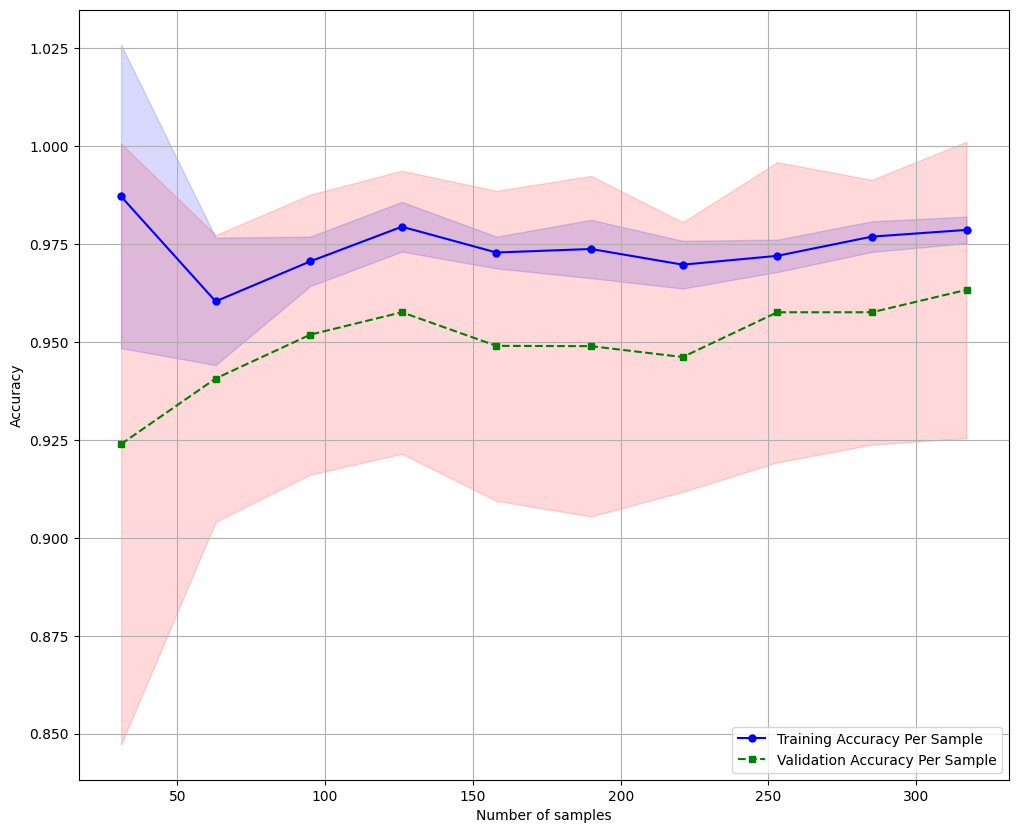

Confusion Matrix
[[ 58   6]
 [  7 100]]
Accuracy: 0.9240, Precision: 0.9434, Recall: 0.9346, F1: 0.9390, AUC: 0.9880


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)

df_train = X_train.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

helper.train_and_evaluate_model('rf', df_train_outlier_removed.iloc[:,:-1], X_test, df_train_outlier_removed.iloc[:,-1], y_test)